In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

### **Question:**
* What is the overall sales trend?

* Which are the Top 10 products by sales?

* Which are the Most Selling Products?

* Which is the most preferred Ship Mode?

* Which are the Most Profitable Category and Sub-Category?

In [2]:
home = '/content/drive/MyDrive/ai/machine_learning/superstore-sales-analysis/'
df = pd.read_excel(f'{home}superstore_sales.xlsx')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,product_id,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [4]:
df.isna().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
dtype: int64

In [11]:
df.describe().round()

,sales,quantity,discount,profit,shipping_cost,year
count,51290.0,51290.0,51290.0,51290.0,51290.0,51290.0
mean,246.0,3.0,0.0,29.0,26.0,2013.0
std,488.0,2.0,0.0,174.0,57.0,1.0
min,0.0,1.0,0.0,-6600.0,0.0,2011.0
25%,31.0,2.0,0.0,0.0,3.0,2012.0
50%,85.0,3.0,0.0,9.0,8.0,2013.0
75%,251.0,5.0,0.0,37.0,24.0,2014.0
max,22638.0,14.0,1.0,8400.0,934.0,2014.0


### **WHAT IS THE OVERALL SALES TREND?**

In [44]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))
df_temp = df.groupby('month_year').sum()['sales'].reset_index()

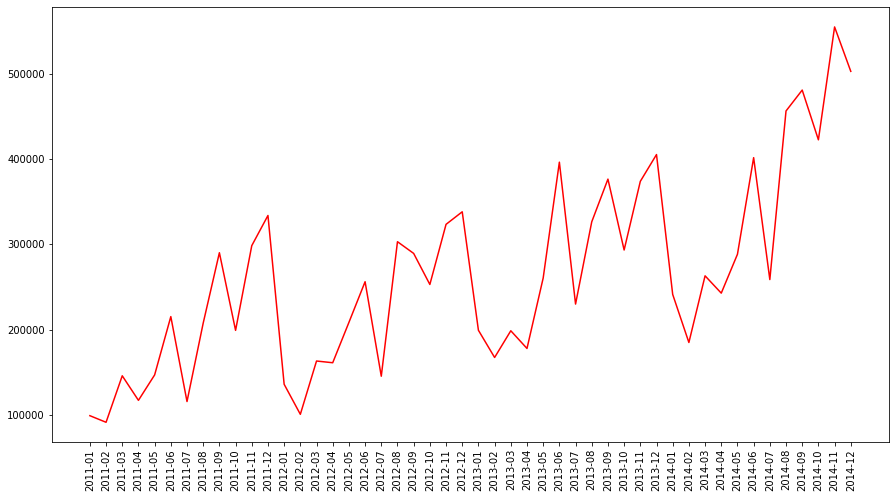

In [45]:
plt.figure(figsize=(15, 8))
plt.plot(df_temp['month_year'], df_temp['sales'], color='red')
plt.xticks(rotation='vertical')
plt.show()

### **WHICH ARE THE TOP 10 PRODUCTS BY SALES?**

In [48]:
prod_sales = pd.DataFrame(df.groupby('product_name').sum()['sales'])
prod_sales.sort_values(by=['sales'], inplace=True, ascending=False)
prod_sales[:10]

,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


### **WHICH ARE THE MOST SELLING PRODUCTS?**

In [223]:
most_sales_prod = pd.DataFrame(df.groupby(['product_name', 'year']).sum()['quantity'])
most_sales_prod.sort_values(by=['quantity'], inplace=True, ascending=False)
most_sales_prod[:16]

quantity
product_name                          year          
Staples                               2014       290
                                      2013       205
                                      2011       203
                                      2012       178
Stockwell Paper Clips, Assorted Sizes 2014       135
Cardinal Index Tab, Clear             2013       119
                                      2014       105
Eldon File Cart, Single Width         2013       102
                                      2014        98
Rogers File Cart, Single Width        2014        94
                                      2013        94
Acco Binder, Economy                  2014        91
Stanley Pencil Sharpener, Water Color 2014        88
Ibico Binding Machine, Economy        2014        85
Sanford Pencil Sharpener, Water Color 2012        84
Avery Index Tab, Clear                2012        84

### **WHAT IS THE MOST PREFERRED SHIP MODE?**

In [202]:
!pip install seaborn

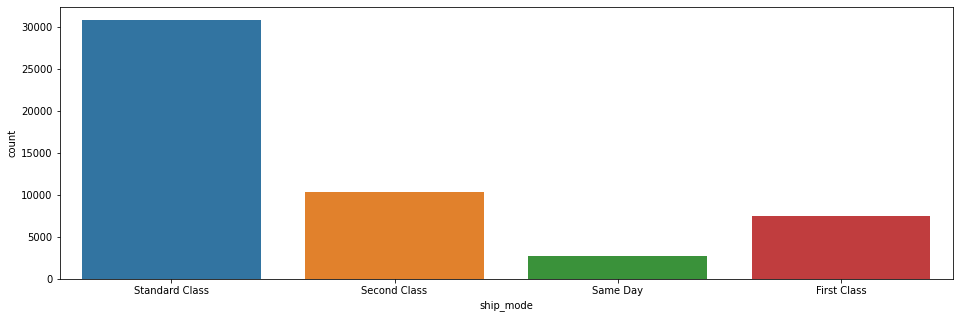

In [205]:
import seaborn as sns

plt.figure(figsize=(16, 5))
sns.countplot(x='ship_mode', data=df)
plt.show()

### **WHICH ARE THE MOST PROFITABLE CATEGORY AND SUB-CATEGORY?**

In [230]:
most_profit_cat = pd.DataFrame(df.groupby(['category', 'sub_category']).sum()['profit'])
most_profit_cat.sort_values(['category', 'profit'], ascending=False)

profit
category        sub_category              
Technology      Copiers       258567.54818
                Phones        216717.00580
                Accessories   129626.30620
                Machines       58867.87300
Office Supplies Appliances    141680.58940
                Storage       108461.48980
                Binders        72449.84600
                Paper          59207.68270
                Art            57953.91090
                Envelopes      29601.11630
                Supplies       22583.26310
                Labels         15010.51200
                Fasteners      11525.42410
Furniture       Bookcases     161924.41950
                Chairs        141973.79750
                Furnishings    46967.42550
                Tables        -64083.38870